 # <p style="background-color:#1E90FF;font-family:Georgia;font-size:150%;color:white;text-align:center;border-radius:20px 20px;"><b>Python Linear Programming to solve Optimization Problems</b></p>

## Problem:

A farmer has recently acquired an 110 hectares piece of land. He has decided to grow Wheat and barley on that land. Due to the quality of the sun and the region’s excellent climate, the entire production of Wheat and Barley can be sold.

He wants to know how to plant each variety in the 110 hectares, given the costs, net profits and labor requirements according to the data shown below. 

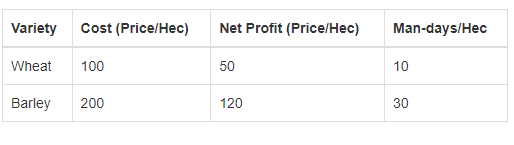

The farmer has a budget of US$10,000 and an availability of 1,200 man-days during the planning horizon.

Find the optimal solution and the optimal value.

[Source](https://upscfever.com/upsc-fever/en/gatecse/en-gatecse-chp13.html#:~:text=Example%3A%20A%20farmer%20has%20recently,and%20Barley%20can%20be%20sold.)

# <p style="background-color:#1E90FF;font-family:Georgia;color:white;text-align:left;border-radius:20px 20px;"><b>Import Libraries and Define the Model</b></p>


In [1]:
#!pip install cplex
#!pip install docplex

In [1]:
from docplex.mp.model import Model

In [2]:
LP_model= Model(name="Agricultural Production")

# <p style="background-color:#1E90FF;font-family:Georgia;color:white;text-align:left;border-radius:20px 20px;"><b>Decision Variables</b></p>

**Step 1: Identify the decision variables**


The total area for growing Wheat = X (in hectares)


The total area for growing Barley = Y (in hectares)


X and Y are my decision variables.

In [3]:
X= LP_model.continuous_var(name="Wheat production")
Y= LP_model.continuous_var(name="Barley production")

In [4]:
#constants for constraints
cost_Wheat= 100
cost_Barley= 200

man_Wheat= 10
man_Barley= 30


#constants for obj. function
profit_Wheat= 50
profit_Barley= 120

# <p style="background-color:#1E90FF;font-family:Georgia;color:white;text-align:left;border-radius:20px 20px;"><b>Constraints</b></p>

**Step 2: Writing the constraints**


- It is given that the farmer has a total budget of Rs. 10,000. The cost of producing Wheat and Barley per hectare is mentioned. We have an upper cap on the total cost spent by the farmer.Considering above we get 

100X + 200Y ≤ 10,000

In [5]:
Total_cost_of_production= LP_model.add_constraint(LP_model.sum([cost_Wheat*X, cost_Barley*Y])<=10000)

- The next constraint is, the upper cap on the availability on the total number of man-days for planning horizon. The total number of man-days available are 1200. As per the table, we are given the man-days per hectare for Wheat and Barley: 

10X + 30Y ≤ 1200

In [6]:
Total_manpowerhour_for_production= LP_model.add_constraint(LP_model.sum([man_Wheat*X, man_Barley*Y])<=1200)

- The third constraint is the total area present for plantation. The total available area is 110 hectares. So the equation becomes, 

X + Y ≤ 110

In [7]:
Total_area= LP_model.add_constraint(LP_model.sum([X, Y])<=110)

# <p style="background-color:#1E90FF;font-family:Georgia;color:white;text-align:left;border-radius:20px 20px;"><b>Objectives/Goals</b></p>


**Step 3: Write the objective function**


Since the production from the entire land can be sold in the market. The farmer would want to maximize the profit for his total produce.


We are given net profit for both Wheat and Barley. The farmer earns a net profit of Rs. 50 for each hectare of Wheat and Rs. 120 for each Barley.


Our objective function (given by Z) is, 

Max Z = 50X + 120Y

In [8]:
LP_model.maximize(profit_Wheat*X + profit_Barley*Y)

# <p style="background-color:#1E90FF;font-family:Georgia;color:white;text-align:left;border-radius:20px 20px;"><b>Model Summary</b></p>


In [9]:
LP_model.print_information()

Model: Agricultural Production
 - number of variables: 2
   - binary=0, integer=0, continuous=2
 - number of constraints: 3
   - linear=3
 - parameters: defaults
 - objective: maximize
 - problem type is: LP


# <p style="background-color:#1E90FF;font-family:Georgia;color:white;text-align:left;border-radius:20px 20px;"><b>Solving...</b></p>
 

In [10]:
sol= LP_model.solve()

In [11]:
sol.display()

solution for: Agricultural Production
objective: 5400.000
Wheat production = 60.000
Barley production = 20.000


In [12]:
#other method
LP_model.print_solution()

objective: 5400.000
  "Wheat production"=60.000
  "Barley production"=20.000


In [13]:
LP_model.parameters.lpmethod = 4
LP_model.solve(log_output=True)

Version identifier: 22.1.0.0 | 2022-03-25 | 54982fbec
CPXPARAM_Read_DataCheck                          1
CPXPARAM_LPMethod                                4
Tried aggregator 1 time.
No LP presolve or aggregator reductions.
Presolve time = 0.00 sec. (0.00 ticks)
Parallel mode: using up to 4 threads for barrier.
Number of nonzeros in lower triangle of A*A' = 3
Using Approximate Minimum Degree ordering
Total time for automatic ordering = 0.00 sec. (0.00 ticks)
Summary statistics for Cholesky factor:
  Threads                   = 4
  Rows in Factor            = 3
  Integer space required    = 3
  Total non-zeros in factor = 6
  Total FP ops to factor    = 14
 Itn      Primal Obj        Dual Obj  Prim Inf Upper Inf  Dual Inf Inf Ratio
   0   5.8569328e+03   0.0000000e+00  1.75e+01  0.00e+00  3.43e+02  1.00e+00
   1   4.8926063e+03   4.8923357e+03  3.53e+00  0.00e+00  6.90e+01  2.16e+04
   2   5.2654549e+03   5.2140122e+03  2.32e-01  0.00e+00  1.32e+01  4.54e+03
   3   5.3945185e+03   5.38983

docplex.mp.solution.SolveSolution(obj=5400,values={Wheat production:60,B..

<div style="color:white; font-size:125%; text-align:left; display:fill; border-radius:5px; background-color:#1E90FF; overflow:hidden">Thanks for reading. I hope you enjoy it and that it was helpful to you.<br>Please don't forget to follow me and give an upvote on</br>
👇👇👇
</div>

**<a href="https://www.kaggle.com/drindeng/" target="_blank" rel="noopener noreferrer">[Kaggle]</a> | 
<a href="https://github.com/drindeng" target="_blank" rel="noopener noreferrer">[GitHub]</a> |
<a href="https://www.linkedin.com/in/turgay-turker/" target="_blank" rel="noopener noreferrer">[Linkedin]</a>**